In [ ]:
import matplotlib.cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns


In [ ]:
import pandas as pd
import numpy as np
import glob
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('mta_1706.csv',encoding = 'utf-8',error_bad_lines=False)
df.dropna(inplace=True)


def time_conv(time):
    newtime = time.split(':')
    H = int(newtime[0])
    if H >= 24:
        H -= 24
    return str(H)+':'+newtime[1]+':'+newtime[2]


df['ExpectedArrivalTime'] = df['ExpectedArrivalTime'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['ScheduledArrivalTime'] = df['ScheduledArrivalTime'].apply(lambda x:time_conv(x))
df['ScheduledArrivalTime'] = df['ScheduledArrivalTime'].apply(lambda x: datetime.strptime(x,'%H:%M:%S'))
df['Date'] = df['ExpectedArrivalTime'].apply(lambda x: x.date())


In [11]:
df.to_pickle('/Users/milesshaozhili/Desktop/Projects/TDI/nycbus/bus06_clean.pkl')

In [1]:
import pickle
df = pickle.load(open('bus06_clean.pkl','rb'))

In [2]:
delay = df['ExpectedArrivalTime'] - df['ScheduledArrivalTime']

In [5]:
delay_seconds =[]

for de in delay:
    if de.total_seconds()<=0 and de.total_seconds() > -40000:
        delay_seconds.append(0)
    elif de.total_seconds()<-40000:
        delay_seconds.append(de.total_seconds()+86400)
    else:
        delay_seconds.append(de.total_seconds())
delay_time = pd.Series(delay_seconds)
df['Delay'] = delay_time[delay_time<40000]                

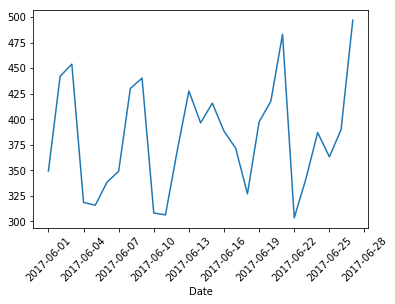

In [7]:
# Average daily delay time for all bus routes
df_date = df.groupby('Date')
df_date.mean()['Delay'].plot(rot=45)

In [ ]:
df['Weekday'] = df['Date'].apply(lambda x:x.weekday())
df_weekday = df.groupby('Weekday')


[Text(0,0,'Sun'),
 Text(0,0,'Mon'),
 Text(0,0,'Tue'),
 Text(0,0,'Wed'),
 Text(0,0,'Thr'),
 Text(0,0,'Fri'),
 Text(0,0,'Sat')]

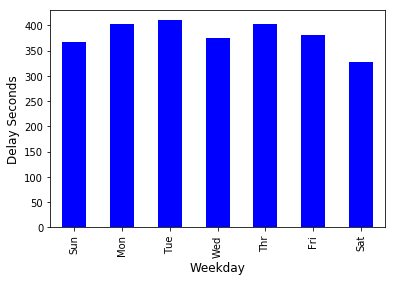

In [24]:
ax = df_weekday.mean()['Delay'].plot.bar(color='blue')
ax.set_xlabel("Weekday", fontsize=12)
ax.set_ylabel("Delay Seconds", fontsize=12)
ax.set_xticklabels(['Sun','Mon','Tue','Wed','Thr','Fri','Sat'])

In [6]:
delay_map = df[df['Delay']>df['Delay'].mean()]

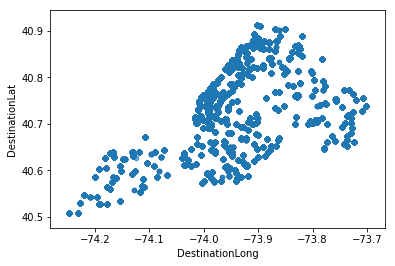

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
delay_map.plot(kind="scatter", x="DestinationLong", y="DestinationLat", alpha=0.4)
plt.show()

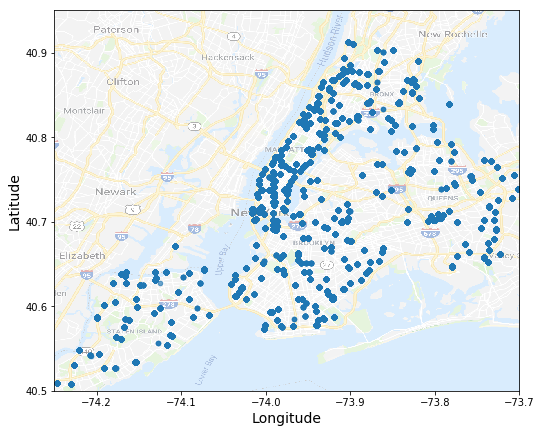

In [13]:
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline
nyc_img=mpimg.imread('nyc.png')
ax = delay_map.plot(kind="scatter", x="DestinationLong", y="DestinationLat", figsize=(10,7), alpha=0.4)
plt.imshow(nyc_img, extent=[-74.25, -73.70, 40.50, 40.95], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.show()